## Cleaning and Preprocessing Data

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [44]:
import pandas as pd
data = pd.read_csv("db/adoption_data.csv")

In [45]:
data.head()

,id,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,adoption_speed,test_train
0,3973,2,Nibble,3,299,0,1,1,7,0,...,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2,train
1,3974,2,No Name Yet,1,265,0,1,1,2,0,...,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0,train
2,3975,1,Brisco,1,307,0,1,2,7,0,...,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3,train
3,3976,1,Miko,4,307,0,2,1,2,0,...,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,Good guard dog very alert active obedience ...,5842f1ff5,8,2,train
4,3977,1,Hunter,1,307,0,1,1,0,0,...,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3,2,train


In [46]:
# from sklearn.preprocessing import LabelEncoder

# # Step 1: Label-encode data set
# label_encoder = LabelEncoder()
# label_encoder.fit(y)
# encoded_y = label_encoder.transform(y)

In [47]:
ml_data = data.copy()

data_binary_encoded = pd.get_dummies(ml_data, columns=["Type","Breed1","Breed2","Gender","Color1","Color2","Color3","MaturitySize","FurLength","Vaccinated","Dewormed","Sterilized","Health"])
data_binary_encoded.head()

,id,Name,Age,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,...,Vaccinated_3,Dewormed_1,Dewormed_2,Dewormed_3,Sterilized_1,Sterilized_2,Sterilized_3,Health_1,Health_2,Health_3
0,3973,Nibble,3,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,...,0,0,1,0,0,1,0,1,0,0
1,3974,No Name Yet,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,...,1,0,0,1,0,0,1,1,0,0
2,3975,Brisco,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,...,0,1,0,0,0,1,0,1,0,0
3,3976,Miko,4,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,Good guard dog very alert active obedience ...,5842f1ff5,...,0,1,0,0,0,1,0,1,0,0
4,3977,Hunter,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,...,0,0,1,0,0,1,0,1,0,0


Convert Categorical data to numbers using Integer or Binary

In [48]:
data_binary_encoded=data_binary_encoded.drop(columns=["test_train","id","Name","Quantity","State","RescuerID","Description","PetID","adoption_speed"])

In [49]:
data_binary_encoded.head()

,Age,Fee,VideoAmt,PhotoAmt,Type_1,Type_2,Breed1_0,Breed1_1,Breed1_3,Breed1_5,...,Vaccinated_3,Dewormed_1,Dewormed_2,Dewormed_3,Sterilized_1,Sterilized_2,Sterilized_3,Health_1,Health_2,Health_3
0,3,100,0,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,1,0,0,2,0,1,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
2,1,0,0,7,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,4,150,0,8,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,1,0,0,3,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [51]:
#Setting Y
y=data["adoption_speed"].values.reshape(-1,1)

Split data into training and testing data

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(
    data_binary_encoded, y, random_state=1)



Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

Fit the Model

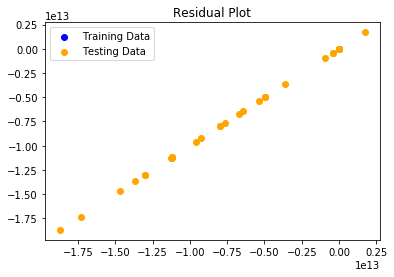

In [54]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()